In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
quantum_linear = np.load('quantum_1order_linear_1traj_100step.npz')['results'].squeeze()
quantum_nonlinear = np.load('quantum_1order_nonlinear_1traj_100step.npz')['results'].squeeze()
classical_linear = np.load('classical_1order_linear_1traj_100step_False.npz')['qsd_result']
classical_nonlinear = np.load('classical_1order_nonlinear_1traj_100step_False.npz')['qsd_result']

print(quantum_linear.shape)
print(quantum_nonlinear.shape)
print(classical_linear.shape)
print(classical_nonlinear.shape)

(101, 5)
(101, 5)
(101, 5)
(101, 5)


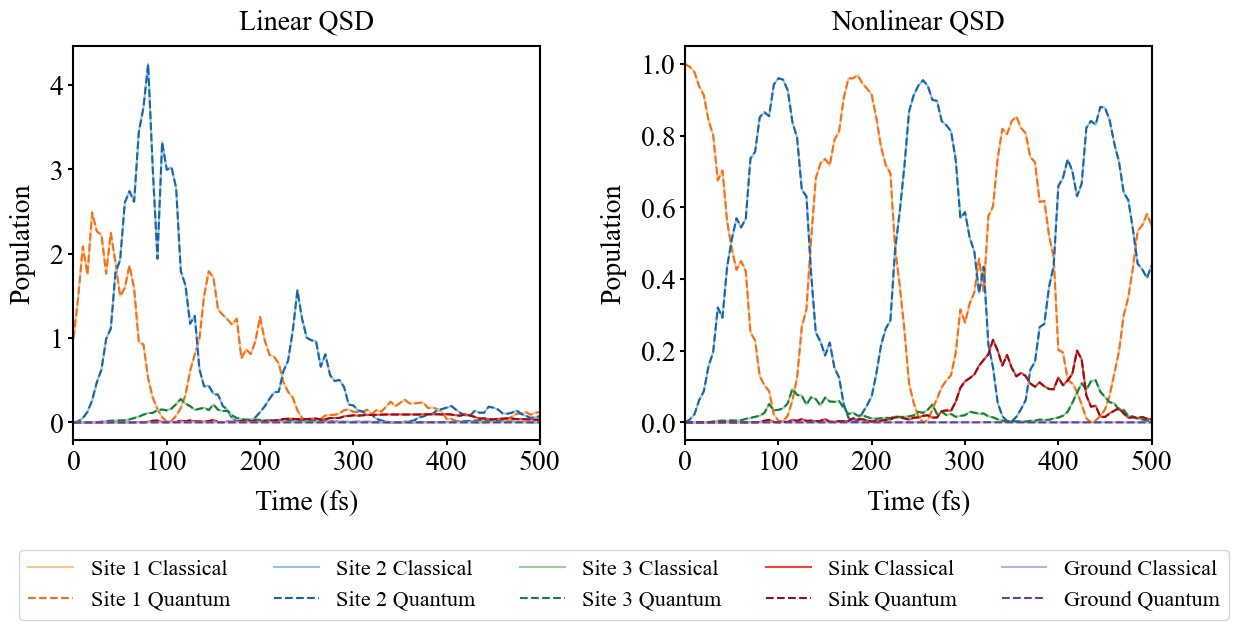

In [21]:
spines_linewidth = 1.5
font_size = 20
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": font_size
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(w_pad=3)
ax1.set_xlabel('Time (fs)', fontsize=font_size, labelpad=10)
ax1.set_ylabel('Population', fontsize=font_size, labelpad=10)
ax2.set_xlabel('Time (fs)', fontsize=font_size, labelpad=10)
ax2.set_ylabel('Population', fontsize=font_size, labelpad=10)
T = 500
step_num = 100
tlist = np.linspace(0.0, T, step_num+1)
ax1.set_xlim([0,T])
ax2.set_xlim([0,T])

ax1.spines['top'].set_linewidth(spines_linewidth)
ax1.spines['bottom'].set_linewidth(spines_linewidth)
ax1.spines['left'].set_linewidth(spines_linewidth)
ax1.spines['right'].set_linewidth(spines_linewidth)
ax2.spines['top'].set_linewidth(spines_linewidth)
ax2.spines['bottom'].set_linewidth(spines_linewidth)
ax2.spines['left'].set_linewidth(spines_linewidth)
ax2.spines['right'].set_linewidth(spines_linewidth)
ax1.tick_params(width=spines_linewidth, labelsize=font_size)
ax2.tick_params(width=spines_linewidth, labelsize=font_size)
ax1.tick_params(labelsize=font_size)
ax2.tick_params(labelsize=font_size)

colormap_red = plt.get_cmap('Oranges')
colormap_green = plt.get_cmap('Blues')
colormap_blue = plt.get_cmap('Greens')
colormap_orange = plt.get_cmap('Reds')
colormap_purple = plt.get_cmap('Purples')

classical_color = 0.4
quantum_color = 0.8

ax1.plot(tlist, classical_linear[:,0], label = 'Site 1 Classical', color=colormap_red(classical_color-0.1))
ax1.plot(tlist, quantum_linear[:,0], label = 'Site 1 Quantum', linestyle='--', color=colormap_red(quantum_color-0.2))
ax1.plot(tlist, classical_linear[:,1], label = 'Site 2 Classical', color=colormap_green(classical_color))
ax1.plot(tlist, quantum_linear[:,1], label = 'Site 2 Quantum', linestyle='--', color=colormap_green(quantum_color))
ax1.plot(tlist, classical_linear[:,2], label = 'Site 3 Classical', color=colormap_blue(classical_color))
ax1.plot(tlist, quantum_linear[:,2], label = 'Site 3 Quantum', linestyle='--', color=colormap_blue(quantum_color))
ax1.plot(tlist, classical_linear[:,3], label = 'Sink Classical', color=colormap_orange(classical_color+0.2))
ax1.plot(tlist, quantum_linear[:,3], label = 'Sink Quantum', linestyle='--', color=colormap_orange(quantum_color+0.1))
ax1.plot(tlist, classical_linear[:,4], label = 'Ground Classical', color=colormap_purple(classical_color))
ax1.plot(tlist, quantum_linear[:,4], label = 'Ground Quantum', linestyle='--', color=colormap_purple(quantum_color))

ax2.plot(tlist, classical_nonlinear[:,0], label = 'Site 1 Classical', color=colormap_red(classical_color-0.1))
ax2.plot(tlist, classical_nonlinear[:,1], label = 'Site 2 Classical', color=colormap_green(classical_color))
ax2.plot(tlist, classical_nonlinear[:,2], label = 'Site 3 Classical', color=colormap_blue(classical_color))
ax2.plot(tlist, classical_nonlinear[:,3], label = 'Sink Classical', color=colormap_orange(classical_color+0.2))
ax2.plot(tlist, classical_nonlinear[:,4], label = 'Ground Classical', color=colormap_purple(classical_color))
ax2.plot(tlist, quantum_nonlinear[:,0], label = 'Site 1 Quantum', linestyle='--', color=colormap_red(quantum_color-0.2))
ax2.plot(tlist, quantum_nonlinear[:,1], label = 'Site 2 Quantum', linestyle='--', color=colormap_green(quantum_color))
ax2.plot(tlist, quantum_nonlinear[:,2], label = 'Site 3 Quantum', linestyle='--', color=colormap_blue(quantum_color))
ax2.plot(tlist, quantum_nonlinear[:,3], label = 'Sink Quantum', linestyle='--', color=colormap_orange(quantum_color+0.1))
ax2.plot(tlist, quantum_nonlinear[:,4], label = 'Ground Quantum', linestyle='--', color=colormap_purple(quantum_color))

ax1.set_title('Linear QSD', fontsize=font_size, y=1.02)
ax2.set_title('Nonlinear QSD', fontsize=font_size, y=1.02)
ax1.legend(fontsize=font_size-4, ncol=5, bbox_to_anchor=(2.5, -0.25))

plt.savefig('FMO_CQ_Comp.pdf', dpi=600, bbox_inches='tight')